<a href="https://colab.research.google.com/github/aadi-29/machinelearning/blob/main/Puring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.csv')
df=df[df.ne('?').all(1)].astype(int)
data = np.array(df)
x = data[:, :-1]
y = data[:, -1]
x

array([[1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       [1016277,       6,       8, ...,       3,       7,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]])

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [13]:
model = DecisionTreeClassifier(criterion = "gini")
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

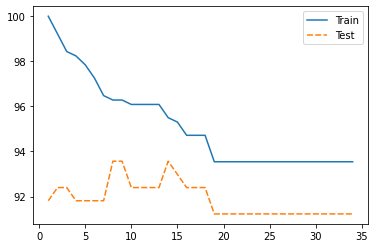

In [14]:
ds = {}
initial_minimum_support=model.min_samples_leaf
for i in range(initial_minimum_support, 35):
      model= DecisionTreeClassifier(criterion='gini', min_samples_leaf=i)
      model.fit(x_train, y_train)
      ds[i] = [model.score (x_train, y_train)*100, model.score(x_test, y_test)*100]
temp = pd.DataFrame(ds).T
temp.rename({0:"Train", 1: "Test"}, axis=1, inplace=True)
sns.lineplot(data=temp);

[Text(133.92000000000002, 195.696, 'X[2] <= 2.5\ngini = 0.454\nsamples = 511\nvalue = [333, 178]'),
 Text(66.96000000000001, 152.208, 'X[6] <= 1.5\ngini = 0.056\nsamples = 314\nvalue = [305, 9]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 277\nvalue = [277, 0]'),
 Text(100.44000000000001, 108.72, 'gini = 0.368\nsamples = 37\nvalue = [28, 9]'),
 Text(200.88000000000002, 152.208, 'X[3] <= 3.5\ngini = 0.244\nsamples = 197\nvalue = [28, 169]'),
 Text(167.40000000000003, 108.72, 'gini = 0.493\nsamples = 34\nvalue = [19, 15]'),
 Text(234.36, 108.72, 'X[2] <= 4.5\ngini = 0.104\nsamples = 163\nvalue = [9, 154]'),
 Text(200.88000000000002, 65.232, 'gini = 0.307\nsamples = 37\nvalue = [7, 30]'),
 Text(267.84000000000003, 65.232, 'X[8] <= 4.5\ngini = 0.031\nsamples = 126\nvalue = [2, 124]'),
 Text(234.36, 21.744, 'gini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(301.32000000000005, 21.744, 'gini = 0.0\nsamples = 82\nvalue = [0, 82]')]

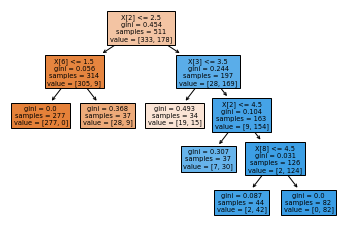

In [15]:
tree.plot_tree(model,filled=True)

In [16]:
temp[ 'Difference'] = temp[ 'Train'] - temp['Test']
bestMinimal = temp[ 'Difference'].index[np.argmin (temp['Difference'].values)]
print(f"Optimal Minimal for the data is {bestMinimal}")

Optimal Minimal for the data is 14
